In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [195]:
cab = pd.read_csv('Cab_Data.csv')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
cab= cab.rename({'Transaction ID': 'Transaction_ID'}, axis=1)

In [196]:
trans = pd.read_csv('Transaction_ID.csv')
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
trans= trans.rename({'Transaction ID': 'Transaction_ID'}, axis=1)
trans= trans.rename({'Customer ID': 'Customer_ID'}, axis=1)
trans.Transaction_ID.nunique()

440098

In [197]:
customer = pd.read_csv('Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
customer= customer.rename({'Customer ID': 'Customer_ID'}, axis=1)

In [198]:
city=pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [15]:
transdata=pd.merge(cab,trans)
transdata.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [16]:
dfall=pd.merge(transdata,customer)
dfall.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [17]:
rm=pd.merge(dfall,city)

In [18]:
from datetime import datetime
import xlrd
rm.sort_values(by=['Date of Travel'])
rm['Date of Travel']=rm['Date of Travel'].map(lambda x:datetime(*xlrd.xldate_as_tuple(int(x), 0)))
rm['year'] = pd.DatetimeIndex(rm['Date of Travel']).year
rm['month'] = pd.DatetimeIndex(rm['Date of Travel']).month
rm.head()               

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4


In [19]:
cols = ['Population', 'Users']
city[cols] = city[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
city["Users"] = city.Users.astype(float)
city["Population"] = city.Population.astype(float)
city['Nonusers'] = city['Population'].sub(city['Users'], axis = 0)
city['Percentage'] = city['Users'].div(city['Population'], axis = 0)
city['Percentage']=city['Percentage']*100
city.head()

,City,Population,Users,Nonusers,Percentage
0,NEW YORK NY,8405837.0,302149.0,8103688.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,1790662.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,1450905.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1321480.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,1150362.0,2.313756


In [20]:
rm['Profit'] = rm['Price Charged'].sub(rm['Cost of Trip'], axis = 0)
rm['ProfitPERKM'] = rm['Profit'].div(rm['KM Travelled'], axis = 0)
rm.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,57.3150,1.882266
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,281.2772,10.739870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,194.6480,4.574571
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,23.6660,0.826904
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,253.9808,6.981330


In [21]:
#total number of travels
company_cab = rm.groupby('Company')
company_cab.size()

Company
Pink Cab       84711
Yellow Cab    274681
dtype: int64

In [22]:
#yellow cabs
yellow_cab = company_cab.get_group('Yellow Cab')
yellow_cab.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,281.2772,10.739870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,194.6480,4.574571
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,253.9808,6.981330
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018,5,50.8912,8.234822
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016,9,210.0920,5.305354


In [23]:
#profits made by yellow cabs
yellow_cab['Profit'].sum()

44020373.17080002

In [24]:
#pink cabs
pink_cab = company_cab.get_group('Pink Cab')
pink_cab.head()

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",2016,1,57.315,1.882266
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",2016,1,23.666,0.826904
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,"814,885","24,701",2018,10,25.096,1.874235
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",2016,1,27.568,3.049558
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",2016,1,25.798,0.777751


In [32]:
#profits made by pink cabs
pink_cab['Profit'].sum()

5307328.321

In [37]:
yellow_cab['year'] = yellow_cab['year'].astype(str)
yellow_cab['month'] = yellow_cab['month'].astype(str)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
groupby_year = yellow_cab.groupby('year')
groupby_year.size()
yellowcab_16 = groupby_year.get_group("2016")
yellowcab_17 = groupby_year.get_group("2017")
yellowcab_18 = groupby_year.get_group("2018")

In [39]:
print("yellow cabs profits in 2016 =", yellowcab_16['Profit'].sum())

yellow cabs profits in 2016 = 13926995.431600003


In [40]:
print("yellow cabs profits in 2017 =", yellowcab_17['Profit'].sum())

yellow cabs profits in 2017 = 16575977.967999998


In [41]:
print("yellow cabs profits in 2018 =", yellowcab_18['Profit'].sum())

yellow cabs profits in 2018 = 13517399.7712


In [43]:
pink_cab['year'] = pink_cab['year'].astype(str)
pink_cab['month'] = pink_cab['month'].astype(str)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
#pinkcabs
groupby_years = pink_cab.groupby('year')
groupby_years.size()
pinkcab_16 = groupby_years.get_group("2016")
pinkcab_17 = groupby_years.get_group("2017")
pinkcab_18 = groupby_years.get_group("2018")

In [45]:
print("Pink cabs profits in 2016 =", pinkcab_16['Profit'].sum())

Pink cabs profits in 2016 = 1713511.2240000002


In [46]:
print("Pink cabs profits in 2017 =", pinkcab_17['Profit'].sum())

Pink cabs profits in 2017 = 2033654.908


In [47]:
print("Pink cabs profits in 2018 =", pinkcab_18['Profit'].sum())

Pink cabs profits in 2018 = 1560162.1890000002


In [48]:
#data by cities
rm['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [49]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_newyork=yellowcab_citywise.get_group("NEW YORK NY")
yellowcab_newyork

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
167110,10006684,2016-02-05,Yellow Cab,NEW YORK NY,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,"8,405,837","302,149",2016,2,617.2164,17.973687
167111,10015798,2016-03-13,Yellow Cab,NEW YORK NY,19.20,559.30,264.9600,2416,Card,Male,28,21399,"8,405,837","302,149",2016,3,294.3400,15.330208
167112,10074689,2016-09-08,Yellow Cab,NEW YORK NY,14.84,322.28,179.8608,2416,Card,Male,28,21399,"8,405,837","302,149",2016,9,142.4192,9.596981
167114,10111321,2016-11-19,Yellow Cab,NEW YORK NY,32.98,981.40,439.2936,2416,Cash,Male,28,21399,"8,405,837","302,149",2016,11,542.1064,16.437429
167115,10148638,2017-02-19,Yellow Cab,NEW YORK NY,19.04,574.60,255.8976,2416,Card,Male,28,21399,"8,405,837","302,149",2017,2,318.7024,16.738571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266989,10386767,2018-10-05,Yellow Cab,NEW YORK NY,11.40,315.37,147.7440,677,Card,Female,19,12958,"8,405,837","302,149",2018,10,167.6260,14.704035
266990,10422265,2018-12-05,Yellow Cab,NEW YORK NY,17.70,374.91,233.6400,677,Card,Female,19,12958,"8,405,837","302,149",2018,12,141.2700,7.981356
266991,10422684,2018-12-08,Yellow Cab,NEW YORK NY,3.15,74.05,40.4460,677,Card,Female,19,12958,"8,405,837","302,149",2018,12,33.6040,10.667937
266992,10435479,2018-12-26,Yellow Cab,NEW YORK NY,39.59,963.61,475.0800,677,Card,Female,19,12958,"8,405,837","302,149",2018,12,488.5300,12.339732


In [50]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_chicago=yellowcab_citywise.get_group("CHICAGO IL")
yellowcab_chicago

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
42146,10001838,2016-01-09,Yellow Cab,CHICAGO IL,6.48,150.60,90.2016,3077,Card,Male,22,16759,"1,955,130","164,468",2016,1,60.3984,9.320741
42147,10022916,2016-04-02,Yellow Cab,CHICAGO IL,37.08,734.87,458.3088,3077,Card,Male,22,16759,"1,955,130","164,468",2016,4,276.5612,7.458501
42148,10036833,2016-05-26,Yellow Cab,CHICAGO IL,39.44,688.04,492.2112,3077,Card,Male,22,16759,"1,955,130","164,468",2016,5,195.8288,4.965233
42149,10048000,2016-06-27,Yellow Cab,CHICAGO IL,20.60,350.12,247.2000,3077,Card,Male,22,16759,"1,955,130","164,468",2016,6,102.9200,4.996117
42150,10132943,2016-12-31,Yellow Cab,CHICAGO IL,31.80,470.19,457.9200,3077,Cash,Male,22,16759,"1,955,130","164,468",2016,12,12.2700,0.385849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98765,10308273,2018-03-10,Yellow Cab,CHICAGO IL,6.72,109.07,90.3168,4126,Cash,Male,29,7082,"1,955,130","164,468",2018,3,18.7532,2.790655
98766,10354320,2018-07-27,Yellow Cab,CHICAGO IL,42.00,597.70,604.8000,4126,Card,Male,29,7082,"1,955,130","164,468",2018,7,-7.1000,-0.169048
98767,10359855,2018-08-11,Yellow Cab,CHICAGO IL,14.84,244.65,203.0112,4126,Card,Male,29,7082,"1,955,130","164,468",2018,8,41.6388,2.805849
98768,10425819,2018-12-14,Yellow Cab,CHICAGO IL,15.20,248.27,187.8720,4126,Card,Male,29,7082,"1,955,130","164,468",2018,12,60.3980,3.973553


In [51]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_LA=yellowcab_citywise.get_group("LOS ANGELES CA")
yellowcab_LA

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
109613,10039340,2016-06-03,Yellow Cab,LOS ANGELES CA,15.54,297.84,186.4800,8693,Card,Male,21,15024,"1,595,037","144,132",2016,6,111.3600,7.166023
109614,10065559,2016-08-14,Yellow Cab,LOS ANGELES CA,14.70,224.82,197.5680,8693,Cash,Male,21,15024,"1,595,037","144,132",2016,8,27.2520,1.853878
109615,10073803,2016-09-10,Yellow Cab,LOS ANGELES CA,18.00,363.27,257.0400,8693,Card,Male,21,15024,"1,595,037","144,132",2016,9,106.2300,5.901667
109616,10086564,2016-10-08,Yellow Cab,LOS ANGELES CA,6.86,105.87,84.7896,8693,Card,Male,21,15024,"1,595,037","144,132",2016,10,21.0804,3.072945
109618,10118251,2016-12-10,Yellow Cab,LOS ANGELES CA,35.64,657.04,504.6624,8693,Card,Male,21,15024,"1,595,037","144,132",2016,12,152.3776,4.275466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157639,10231077,2017-09-24,Yellow Cab,LOS ANGELES CA,10.62,266.06,140.1840,8466,Card,Male,21,7584,"1,595,037","144,132",2017,9,125.8760,11.852731
157641,10314592,2018-03-27,Yellow Cab,LOS ANGELES CA,5.25,80.84,69.9300,8466,Card,Male,21,7584,"1,595,037","144,132",2018,3,10.9100,2.078095
157642,10325237,2018-05-05,Yellow Cab,LOS ANGELES CA,46.40,970.67,579.0720,8466,Cash,Male,21,7584,"1,595,037","144,132",2018,5,391.5980,8.439612
157643,10339433,2018-06-19,Yellow Cab,LOS ANGELES CA,47.60,829.25,639.7440,8466,Cash,Male,21,7584,"1,595,037","144,132",2018,6,189.5060,3.981218


In [52]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_DC=yellowcab_citywise.get_group("WASHINGTON DC")
yellowcab_DC

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
315656,10066690,2016-08-17,Yellow Cab,WASHINGTON DC,31.59,447.75,416.9880,51779,Card,Male,28,7138,"418,859","127,001",2016,8,30.7620,0.973789
315657,10072264,2016-08-31,Yellow Cab,WASHINGTON DC,26.73,361.77,346.4208,51779,Cash,Male,28,7138,"418,859","127,001",2016,8,15.3492,0.574231
315658,10186227,2017-06-19,Yellow Cab,WASHINGTON DC,38.85,556.78,522.1440,51779,Card,Male,28,7138,"418,859","127,001",2017,6,34.6360,0.891532
315659,10205290,2017-08-07,Yellow Cab,WASHINGTON DC,30.72,471.42,442.3680,51779,Card,Male,28,7138,"418,859","127,001",2017,8,29.0520,0.945703
315660,10221700,2017-09-08,Yellow Cab,WASHINGTON DC,4.44,88.46,56.4768,51779,Card,Male,28,7138,"418,859","127,001",2017,9,31.9832,7.203423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",2018,3,143.6180,3.740052
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",2018,4,23.0464,6.455574
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",2018,7,-5.8540,-0.249531
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001",2018,8,-6.0900,-0.220652


In [53]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_boston=yellowcab_citywise.get_group("BOSTON MA")
yellowcab_boston

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
12454,10020699,2016-04-04,Yellow Cab,BOSTON MA,30.42,391.37,368.6904,59799,Card,Male,33,19271,"248,968","80,021",2016,4,22.6796,0.745549
12455,10022582,2016-04-07,Yellow Cab,BOSTON MA,19.55,346.37,251.0220,59799,Card,Male,33,19271,"248,968","80,021",2016,4,95.3480,4.877136
12456,10085980,2016-10-01,Yellow Cab,BOSTON MA,35.84,782.10,477.3888,59799,Cash,Male,33,19271,"248,968","80,021",2016,10,304.7112,8.501987
12457,10089105,2016-10-08,Yellow Cab,BOSTON MA,5.75,118.27,69.6900,59799,Card,Male,33,19271,"248,968","80,021",2016,10,48.5800,8.448696
12458,10092608,2016-10-18,Yellow Cab,BOSTON MA,16.64,275.81,233.6256,59799,Card,Male,33,19271,"248,968","80,021",2016,10,42.1844,2.535120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42136,10425614,2018-12-15,Yellow Cab,BOSTON MA,39.52,564.68,559.6032,58200,Card,Male,31,6739,"248,968","80,021",2018,12,5.0768,0.128462
42140,10359625,2018-08-11,Yellow Cab,BOSTON MA,33.04,459.13,444.0576,59005,Card,Female,24,13380,"248,968","80,021",2018,8,15.0724,0.456186
42141,10408986,2018-11-17,Yellow Cab,BOSTON MA,35.96,559.79,496.2480,59005,Card,Female,24,13380,"248,968","80,021",2018,11,63.5420,1.767019
42143,10353979,2018-07-28,Yellow Cab,BOSTON MA,6.90,78.86,86.1120,58491,Card,Female,27,27302,"248,968","80,021",2018,7,-7.2520,-1.051014


In [54]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_san=yellowcab_citywise.get_group("SAN DIEGO CA")
yellowcab_san

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
276722,10055897,2016-07-21,Yellow Cab,SAN DIEGO CA,6.65,117.53,82.9920,20330,Card,Male,53,28591,"959,307","69,995",2016,7,34.5380,5.193684
276724,10097763,2016-10-23,Yellow Cab,SAN DIEGO CA,24.00,358.93,313.9200,20330,Card,Male,53,28591,"959,307","69,995",2016,10,45.0100,1.875417
276725,10146778,2017-02-17,Yellow Cab,SAN DIEGO CA,12.10,156.45,174.2400,20330,Card,Male,53,28591,"959,307","69,995",2017,2,-17.7900,-1.470248
276726,10150956,2017-03-05,Yellow Cab,SAN DIEGO CA,37.37,698.07,448.4400,20330,Card,Male,53,28591,"959,307","69,995",2017,3,249.6300,6.679957
276729,10211209,2017-08-20,Yellow Cab,SAN DIEGO CA,39.39,696.83,538.8552,20330,Cash,Male,53,28591,"959,307","69,995",2017,8,157.9748,4.010531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297190,10337570,2018-06-08,Yellow Cab,SAN DIEGO CA,26.64,520.08,361.2384,18494,Cash,Male,50,18563,"959,307","69,995",2018,6,158.8416,5.962523
297191,10337586,2018-06-04,Yellow Cab,SAN DIEGO CA,15.47,275.80,215.3424,18494,Cash,Male,50,18563,"959,307","69,995",2018,6,60.4576,3.908054
297192,10344820,2018-07-03,Yellow Cab,SAN DIEGO CA,9.09,124.55,128.7144,18359,Card,Female,33,20589,"959,307","69,995",2018,7,-4.1644,-0.458130
297194,10383833,2018-09-26,Yellow Cab,SAN DIEGO CA,9.90,152.32,119.9880,18359,Cash,Female,33,20589,"959,307","69,995",2018,9,32.3320,3.265859


In [55]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_silicon=yellowcab_citywise.get_group("SILICON VALLEY")
yellowcab_silicon

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
305207,10168975,2017-05-01,Yellow Cab,SILICON VALLEY,3.36,63.80,42.3360,14850,Card,Male,39,14563,"1,177,609","27,247",2017,5,21.4640,6.388095
305208,10399074,2018-10-28,Yellow Cab,SILICON VALLEY,31.86,671.16,389.9664,14850,Card,Male,39,14563,"1,177,609","27,247",2018,10,281.1936,8.825913
305210,10035768,2016-05-17,Yellow Cab,SILICON VALLEY,10.26,215.81,142.8192,13157,Card,Male,38,7082,"1,177,609","27,247",2016,5,72.9908,7.114113
305211,10157738,2017-03-28,Yellow Cab,SILICON VALLEY,10.78,288.18,152.6448,13157,Cash,Male,38,7082,"1,177,609","27,247",2017,3,135.5352,12.572839
305217,10419355,2018-12-01,Yellow Cab,SILICON VALLEY,22.44,435.81,312.3648,13231,Card,Male,61,22435,"1,177,609","27,247",2018,12,123.4452,5.501123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313715,10432642,2018-12-22,Yellow Cab,SILICON VALLEY,30.40,764.26,404.9280,13803,Card,Female,27,10531,"1,177,609","27,247",2018,12,359.3320,11.820132
313716,10432671,2018-12-21,Yellow Cab,SILICON VALLEY,23.76,616.86,307.9296,14351,Card,Male,49,10285,"1,177,609","27,247",2018,12,308.9304,13.002121
313720,10436340,2018-12-26,Yellow Cab,SILICON VALLEY,36.00,705.90,505.4400,13751,Cash,Female,30,16549,"1,177,609","27,247",2018,12,200.4600,5.568333
313721,10436349,2018-12-29,Yellow Cab,SILICON VALLEY,35.96,943.10,500.5632,12551,Cash,Female,26,17539,"1,177,609","27,247",2018,12,442.5368,12.306363


In [56]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_seattle=yellowcab_citywise.get_group("SEATTLE WA")
yellowcab_seattle

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
297209,10071946,2016-09-04,Yellow Cab,SEATTLE WA,13.20,177.29,171.0720,36512,Card,Male,27,8266,"671,238","25,063",2016,9,6.2180,0.471061
297210,10131164,2016-12-26,Yellow Cab,SEATTLE WA,33.48,618.13,466.0416,36512,Card,Male,27,8266,"671,238","25,063",2016,12,152.0884,4.542664
297215,10274341,2017-12-08,Yellow Cab,SEATTLE WA,11.33,200.77,141.3984,36512,Card,Male,27,8266,"671,238","25,063",2017,12,59.3716,5.240212
297216,10311205,2018-03-20,Yellow Cab,SEATTLE WA,22.00,343.89,311.5200,36512,Card,Male,27,8266,"671,238","25,063",2018,3,32.3700,1.471364
297219,10149197,2017-02-22,Yellow Cab,SEATTLE WA,41.04,882.97,586.0512,36850,Card,Male,64,21151,"671,238","25,063",2017,2,296.9188,7.234864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305200,10436281,2018-12-29,Yellow Cab,SEATTLE WA,44.84,850.65,570.3648,37914,Card,Male,39,12889,"671,238","25,063",2018,12,280.2852,6.250785
305201,10436285,2018-12-29,Yellow Cab,SEATTLE WA,24.96,496.14,338.4576,37319,Card,Female,37,21923,"671,238","25,063",2018,12,157.6824,6.317404
305202,10436290,2018-12-27,Yellow Cab,SEATTLE WA,17.10,295.95,240.0840,36182,Card,Female,22,15133,"671,238","25,063",2018,12,55.8660,3.267018
305203,10439766,2018-12-31,Yellow Cab,SEATTLE WA,21.42,342.33,275.0328,36141,Card,Female,21,14944,"671,238","25,063",2018,12,67.2972,3.141793


In [57]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_atlanta=yellowcab_citywise.get_group("ATLANTA GA")
yellowcab_atlanta

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,281.2772,10.739870
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,194.6480,4.574571
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,253.9808,6.981330
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701",2018,5,50.8912,8.234822
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701",2016,9,210.0920,5.305354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,10429857,2018-12-21,Yellow Cab,ATLANTA GA,3.30,59.16,47.1240,28826,Cash,Male,32,14942,"814,885","24,701",2018,12,12.0360,3.647273
7553,10434098,2018-12-25,Yellow Cab,ATLANTA GA,2.28,39.35,30.3696,29895,Card,Male,31,24885,"814,885","24,701",2018,12,8.9804,3.938772
7554,10434122,2018-12-29,Yellow Cab,ATLANTA GA,35.15,658.16,493.5060,27166,Card,Male,62,9747,"814,885","24,701",2018,12,164.6540,4.684324
7555,10437651,2018-01-05,Yellow Cab,ATLANTA GA,38.76,721.59,511.6320,27744,Cash,Male,21,15528,"814,885","24,701",2018,1,209.9580,5.416873


In [58]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_dallas=yellowcab_citywise.get_group("DALLAS TX")
yellowcab_dallas

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
98773,10146177,2017-02-18,Yellow Cab,DALLAS TX,5.60,112.20,74.5920,24086,Cash,Male,60,19410,"942,908","22,157",2017,2,37.6080,6.715714
98774,10182630,2017-06-04,Yellow Cab,DALLAS TX,18.36,550.71,255.5712,24086,Cash,Male,60,19410,"942,908","22,157",2017,6,295.1388,16.075098
98776,10057682,2016-07-28,Yellow Cab,DALLAS TX,10.08,228.23,142.7328,25155,Cash,Male,27,10997,"942,908","22,157",2016,7,85.4972,8.481865
98777,10096569,2016-10-23,Yellow Cab,DALLAS TX,11.88,239.79,151.1136,25155,Card,Male,27,10997,"942,908","22,157",2016,10,88.6764,7.464343
98778,10325176,2018-05-04,Yellow Cab,DALLAS TX,38.22,1061.52,458.6400,25155,Cash,Male,27,10997,"942,908","22,157",2018,5,602.8800,15.773940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105782,10438217,2018-01-02,Yellow Cab,DALLAS TX,17.60,328.94,244.9920,26164,Cash,Male,34,12929,"942,908","22,157",2018,1,83.9480,4.769773
105783,10438267,2018-01-08,Yellow Cab,DALLAS TX,7.07,133.41,89.9304,26164,Cash,Male,34,12929,"942,908","22,157",2018,1,43.4796,6.149873
105784,10438224,2018-01-02,Yellow Cab,DALLAS TX,10.35,195.30,124.2000,24781,Card,Female,43,11829,"942,908","22,157",2018,1,71.1000,6.869565
105785,10438233,2018-01-08,Yellow Cab,DALLAS TX,7.60,136.58,109.4400,25157,Cash,Female,27,10108,"942,908","22,157",2018,1,27.1400,3.571053


In [59]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_miami=yellowcab_citywise.get_group("MIAMI FL")
yellowcab_miami

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
157648,10277417,2017-12-16,Yellow Cab,MIAMI FL,37.44,643.04,471.7440,11224,Cash,Male,18,2913,"1,339,155","17,675",2017,12,171.2960,4.575214
157649,10354605,2018-07-25,Yellow Cab,MIAMI FL,25.52,466.59,333.8016,11224,Card,Male,18,2913,"1,339,155","17,675",2018,7,132.7884,5.203307
157653,10321076,2018-04-17,Yellow Cab,MIAMI FL,27.75,535.68,359.6400,9584,Card,Male,31,22812,"1,339,155","17,675",2018,4,176.0400,6.343784
157654,10421939,2018-12-08,Yellow Cab,MIAMI FL,32.30,591.27,403.1040,9584,Cash,Male,31,22812,"1,339,155","17,675",2018,12,188.1660,5.825573
157655,10426423,2018-12-15,Yellow Cab,MIAMI FL,23.46,419.06,295.5960,9584,Cash,Male,31,22812,"1,339,155","17,675",2018,12,123.4640,5.262745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164090,10434998,2018-12-27,Yellow Cab,MIAMI FL,5.20,80.74,74.2560,10970,Card,Female,57,20887,"1,339,155","17,675",2018,12,6.4840,1.246923
164095,10438516,2018-01-02,Yellow Cab,MIAMI FL,28.00,525.82,356.1600,11018,Cash,Female,36,2503,"1,339,155","17,675",2018,1,169.6600,6.059286
164096,10438532,2018-01-06,Yellow Cab,MIAMI FL,30.42,576.71,430.7472,9226,Card,Female,51,15694,"1,339,155","17,675",2018,1,145.9628,4.798251
164097,10438566,2018-01-04,Yellow Cab,MIAMI FL,44.80,817.28,580.6080,11852,Cash,Female,31,11874,"1,339,155","17,675",2018,1,236.6720,5.282857


In [60]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_austin=yellowcab_citywise.get_group("AUSTIN TX")
yellowcab_austin

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
7558,10092514,2016-10-15,Yellow Cab,AUSTIN TX,17.70,401.68,250.6320,33788,Card,Male,23,23788,"698,371","14,978",2016,10,151.0480,8.533785
7559,10246065,2017-10-29,Yellow Cab,AUSTIN TX,35.97,492.70,500.7024,33788,Cash,Male,23,23788,"698,371","14,978",2017,10,-8.0024,-0.222474
7561,10177181,2017-05-24,Yellow Cab,AUSTIN TX,15.45,470.82,198.3780,34106,Cash,Male,19,19980,"698,371","14,978",2017,5,272.4420,17.633786
7562,10393034,2018-10-19,Yellow Cab,AUSTIN TX,6.90,134.27,92.7360,34106,Card,Male,19,19980,"698,371","14,978",2018,10,41.5340,6.019420
7563,10000408,2016-01-03,Yellow Cab,AUSTIN TX,33.32,1050.10,411.8352,33771,Card,Male,31,23347,"698,371","14,978",2016,1,638.2648,19.155606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12448,10437692,2018-01-03,Yellow Cab,AUSTIN TX,44.08,659.31,618.8832,35595,Cash,Male,24,31144,"698,371","14,978",2018,1,40.4268,0.917123
12449,10437694,2018-01-07,Yellow Cab,AUSTIN TX,29.10,440.03,363.1680,35394,Cash,Male,38,13210,"698,371","14,978",2018,1,76.8620,2.641306
12450,10437699,2018-01-05,Yellow Cab,AUSTIN TX,16.48,254.62,201.7152,35280,Cash,Male,21,7264,"698,371","14,978",2018,1,52.9048,3.210243
12451,10437709,2018-01-05,Yellow Cab,AUSTIN TX,9.90,203.32,121.1760,33671,Cash,Male,18,8224,"698,371","14,978",2018,1,82.1440,8.297374


In [61]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_oc=yellowcab_citywise.get_group("ORANGE COUNTY")
yellowcab_oc

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
266995,10394767,2018-10-18,Yellow Cab,ORANGE COUNTY,25.48,435.52,308.8176,16700,Card,Male,32,3161,"1,030,185","12,994",2018,10,126.7024,4.972622
266998,10217418,2017-08-27,Yellow Cab,ORANGE COUNTY,29.40,595.00,423.3600,15732,Cash,Male,38,15171,"1,030,185","12,994",2017,8,171.6400,5.838095
267000,10360778,2018-08-11,Yellow Cab,ORANGE COUNTY,24.15,483.51,304.2900,15400,Card,Male,48,2363,"1,030,185","12,994",2018,8,179.2200,7.421118
267007,10001002,2016-01-08,Yellow Cab,ORANGE COUNTY,36.96,876.81,510.0480,17444,Cash,Male,24,10177,"1,030,185","12,994",2016,1,366.7620,9.923214
267008,10001003,2016-01-03,Yellow Cab,ORANGE COUNTY,22.23,707.68,280.0980,17511,Card,Male,23,10711,"1,030,185","12,994",2016,1,427.5820,19.234458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270971,10439379,2018-01-08,Yellow Cab,ORANGE COUNTY,12.60,190.98,178.4160,16448,Card,Male,55,13854,"1,030,185","12,994",2018,1,12.5640,0.997143
270972,10439382,2018-01-02,Yellow Cab,ORANGE COUNTY,36.72,511.13,502.3296,17931,Cash,Male,36,22848,"1,030,185","12,994",2018,1,8.8004,0.239662
270973,10439387,2018-01-02,Yellow Cab,ORANGE COUNTY,33.30,499.57,447.5520,16689,Cash,Male,25,24809,"1,030,185","12,994",2018,1,52.0180,1.562102
270974,10439392,2018-01-04,Yellow Cab,ORANGE COUNTY,29.70,427.19,424.1160,15048,Card,Female,31,12029,"1,030,185","12,994",2018,1,3.0740,0.103502


In [62]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_denver=yellowcab_citywise.get_group("DENVER CO")
yellowcab_denver

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
105788,10397458,2018-10-28,Yellow Cab,DENVER CO,7.68,132.89,94.9248,30718,Cash,Male,52,20255,"754,233","12,421",2018,10,37.9652,4.943385
105793,10409505,2018-11-17,Yellow Cab,DENVER CO,26.19,489.38,329.9940,31634,Card,Male,47,2880,"754,233","12,421",2018,11,159.3860,6.085758
105795,10182637,2017-06-10,Yellow Cab,DENVER CO,26.88,517.42,354.8160,30725,Card,Male,29,4437,"754,233","12,421",2017,6,162.6040,6.049256
105796,10000679,2016-01-11,Yellow Cab,DENVER CO,15.08,483.16,199.0560,32400,Card,Male,28,17950,"754,233","12,421",2016,1,284.1040,18.839788
105797,10068108,2016-08-20,Yellow Cab,DENVER CO,15.52,297.68,223.4880,32400,Card,Male,28,17950,"754,233","12,421",2016,8,74.1920,4.780412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109607,10438274,2018-01-04,Yellow Cab,DENVER CO,5.45,90.82,68.0160,31740,Cash,Female,29,31094,"754,233","12,421",2018,1,22.8040,4.184220
109608,10438275,2018-01-03,Yellow Cab,DENVER CO,47.20,691.85,634.3680,32541,Card,Female,29,19171,"754,233","12,421",2018,1,57.4820,1.217839
109609,10438283,2018-01-06,Yellow Cab,DENVER CO,35.64,604.89,500.3856,30736,Cash,Male,55,7655,"754,233","12,421",2018,1,104.5044,2.932222
109610,10438292,2018-01-05,Yellow Cab,DENVER CO,31.32,556.70,405.9072,32416,Card,Female,35,13726,"754,233","12,421",2018,1,150.7928,4.814585


In [63]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_nashville=yellowcab_citywise.get_group("NASHVILLE TN")
yellowcab_nashville

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
164102,10000799,2016-01-02,Yellow Cab,NASHVILLE TN,29.25,1001.93,361.5300,54825,Card,Male,28,6216,"327,225","9,270",2016,1,640.4000,21.894017
164105,10000800,2016-01-06,Yellow Cab,NASHVILLE TN,41.40,1174.32,506.7360,54218,Cash,Male,49,14640,"327,225","9,270",2016,1,667.5840,16.125217
164113,10390217,2018-10-12,Yellow Cab,NASHVILLE TN,39.78,700.78,482.1336,56509,Cash,Male,23,19718,"327,225","9,270",2018,10,218.6464,5.496390
164114,10002132,2016-01-09,Yellow Cab,NASHVILLE TN,8.48,183.24,110.9184,55644,Cash,Male,20,11323,"327,225","9,270",2016,1,72.3216,8.528491
164116,10002133,2016-01-16,Yellow Cab,NASHVILLE TN,13.26,269.25,181.3968,55584,Card,Male,19,10015,"327,225","9,270",2016,1,87.8532,6.625430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167100,10435031,2018-12-25,Yellow Cab,NASHVILLE TN,11.10,187.27,137.1960,55085,Card,Male,47,18318,"327,225","9,270",2018,12,50.0740,4.511171
167101,10435032,2018-12-29,Yellow Cab,NASHVILLE TN,44.80,741.71,628.9920,55837,Card,Female,34,9693,"327,225","9,270",2018,12,112.7180,2.516027
167102,10435035,2018-12-30,Yellow Cab,NASHVILLE TN,41.20,636.64,573.5040,55578,Card,Male,59,17299,"327,225","9,270",2018,12,63.1360,1.532427
167107,10438579,2018-01-05,Yellow Cab,NASHVILLE TN,39.24,635.43,555.6384,56014,Cash,Male,23,15144,"327,225","9,270",2018,1,79.7916,2.033425


In [64]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_sac=yellowcab_citywise.get_group("SACRAMENTO CA")
yellowcab_sac

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
274356,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,47687,Card,Male,25,16088,"545,776","7,044",2016,1,518.2200,13.637368
274357,10001015,2016-01-11,Yellow Cab,SACRAMENTO CA,5.00,131.02,68.4000,46820,Cash,Male,34,3809,"545,776","7,044",2016,1,62.6200,12.524000
274359,10001016,2016-01-06,Yellow Cab,SACRAMENTO CA,23.69,513.53,298.4940,47146,Cash,Male,25,15753,"545,776","7,044",2016,1,215.0360,9.077079
274360,10001017,2016-01-06,Yellow Cab,SACRAMENTO CA,34.51,756.30,451.3908,46007,Card,Male,28,18102,"545,776","7,044",2016,1,304.9092,8.835387
274365,10002352,2016-01-12,Yellow Cab,SACRAMENTO CA,23.31,759.23,318.8808,47686,Cash,Male,44,2315,"545,776","7,044",2016,1,440.3492,18.891000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276708,10435920,2018-12-28,Yellow Cab,SACRAMENTO CA,12.24,214.31,148.3488,45424,Card,Female,63,10034,"545,776","7,044",2018,12,65.9612,5.388987
276716,10439417,2018-01-03,Yellow Cab,SACRAMENTO CA,9.63,123.87,123.6492,46462,Card,Male,55,18683,"545,776","7,044",2018,1,0.2208,0.022928
276717,10439419,2018-12-31,Yellow Cab,SACRAMENTO CA,32.67,469.42,466.5276,46512,Cash,Male,20,16996,"545,776","7,044",2018,12,2.8924,0.088534
276718,10439423,2018-01-01,Yellow Cab,SACRAMENTO CA,35.70,498.31,462.6720,45772,Cash,Female,60,3169,"545,776","7,044",2018,1,35.6380,0.998263


In [68]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_phoenix=yellowcab_citywise.get_group("PHOENIX AZ")
yellowcab_phoenix

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
270978,10001008,2016-01-09,Yellow Cab,PHOENIX AZ,14.04,361.75,181.9584,22859,Card,Male,62,6120,"943,999","6,133",2016,1,179.7916,12.805670
270979,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,21481,Card,Male,28,18030,"943,999","6,133",2016,1,597.3200,19.910667
270980,10001010,2016-01-08,Yellow Cab,PHOENIX AZ,12.84,351.51,161.7840,22802,Card,Male,18,2733,"943,999","6,133",2016,1,189.7260,14.776168
270981,10001011,2016-01-07,Yellow Cab,PHOENIX AZ,36.26,1002.40,469.9296,21417,Card,Male,38,24041,"943,999","6,133",2016,1,532.4704,14.684788
270988,10002348,2016-01-10,Yellow Cab,PHOENIX AZ,23.00,485.99,325.6800,23085,Card,Male,30,23058,"943,999","6,133",2016,1,160.3100,6.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273030,10435906,2018-12-29,Yellow Cab,PHOENIX AZ,44.80,769.91,591.3600,23536,Cash,Female,37,3589,"943,999","6,133",2018,12,178.5500,3.985491
273036,10439396,2018-01-01,Yellow Cab,PHOENIX AZ,38.00,703.50,487.9200,23933,Card,Male,27,2271,"943,999","6,133",2018,1,215.5800,5.673158
273037,10439398,2018-01-09,Yellow Cab,PHOENIX AZ,24.42,447.95,348.7176,22142,Card,Female,39,13208,"943,999","6,133",2018,1,99.2324,4.063571
273038,10439405,2018-01-04,Yellow Cab,PHOENIX AZ,19.76,338.97,253.7184,21509,Card,Female,20,19565,"943,999","6,133",2018,1,85.2516,4.314352


In [69]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_tucson=yellowcab_citywise.get_group("TUCSON AZ")
yellowcab_tucson

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
313726,10001257,2016-01-07,Yellow Cab,TUCSON AZ,38.88,1138.99,536.5440,41978,Card,Male,22,4254,"631,442","5,712",2016,1,602.4460,15.495010
313727,10153490,2017-03-10,Yellow Cab,TUCSON AZ,28.08,436.36,347.0688,41978,Card,Male,22,4254,"631,442","5,712",2017,3,89.2912,3.179886
313729,10001258,2016-01-08,Yellow Cab,TUCSON AZ,7.91,231.72,94.9200,40845,Cash,Male,31,7467,"631,442","5,712",2016,1,136.8000,17.294564
313730,10001259,2016-01-02,Yellow Cab,TUCSON AZ,28.50,965.16,365.9400,41819,Card,Male,47,3300,"631,442","5,712",2016,1,599.2200,21.025263
313734,10002570,2016-01-09,Yellow Cab,TUCSON AZ,31.36,495.18,421.4784,39328,Card,Male,25,13033,"631,442","5,712",2016,1,73.7016,2.350179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315648,10436359,2018-12-29,Yellow Cab,TUCSON AZ,10.10,160.37,130.8960,39436,Card,Female,55,6448,"631,442","5,712",2018,12,29.4740,2.918218
315649,10436360,2018-12-29,Yellow Cab,TUCSON AZ,26.19,416.65,339.4224,41254,Card,Male,29,21951,"631,442","5,712",2018,12,77.2276,2.948744
315652,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,"631,442","5,712",2018,1,71.2100,3.747895
315653,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,"631,442","5,712",2018,1,21.8600,3.903571


In [70]:
yellowcab_citywise=yellow_cab.groupby('City')
yellowcab_pitts=yellowcab_citywise.get_group("PITTSBURGH PA")
yellowcab_pitts

,Transaction_ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,year,month,Profit,ProfitPERKM
273042,10001012,2016-01-09,Yellow Cab,PITTSBURGH PA,3.09,95.53,40.7880,50056,Cash,Male,65,3057,"542,085","3,643",2016,1,54.7420,17.715858
273044,10001013,2016-01-09,Yellow Cab,PITTSBURGH PA,31.20,1134.12,404.3520,49858,Cash,Male,58,5370,"542,085","3,643",2016,1,729.7680,23.390000
273046,10002351,2016-01-15,Yellow Cab,PITTSBURGH PA,38.52,986.44,526.9536,48937,Card,Male,55,32917,"542,085","3,643",2016,1,459.4864,11.928515
273047,10003826,2016-01-16,Yellow Cab,PITTSBURGH PA,35.70,663.14,496.9440,50335,Cash,Male,20,2059,"542,085","3,643",2016,1,166.1960,4.655350
273048,10003827,2016-01-17,Yellow Cab,PITTSBURGH PA,20.00,350.79,268.8000,48199,Cash,Male,39,17082,"542,085","3,643",2016,1,81.9900,4.099500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274348,10439410,2018-12-31,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.8432,50921,Card,Male,33,18698,"542,085","3,643",2018,12,28.2068,6.981881
274349,10439411,2018-01-06,Yellow Cab,PITTSBURGH PA,22.66,404.53,271.9200,48440,Cash,Female,31,21246,"542,085","3,643",2018,1,132.6100,5.852162
274350,10439412,2018-01-04,Yellow Cab,PITTSBURGH PA,31.92,605.09,425.1744,50215,Cash,Female,48,10608,"542,085","3,643",2018,1,179.9156,5.636454
274351,10439414,2018-01-03,Yellow Cab,PITTSBURGH PA,40.25,733.37,516.8100,49971,Card,Male,30,21896,"542,085","3,643",2018,1,216.5600,5.380373


In [71]:
#age brackets
bins= [0,25,45,65,110]
labels = ['18-25','26-45','46-65','65+']
yellow_cab['AgeGroup'] = pd.cut(yellow_cab['Age'], bins=bins, labels=labels, right=False)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
bins= [0,3000,10000,300000]
labels = ['low','middle','high']
yellow_cab['Income cat'] = pd.cut(yellow_cab['Income (USD/Month)'], bins=bins, labels=labels, right=False)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
bins= [0,3000,10000,300000]
labels = ['low','middle','high']
pink_cab['Income cat'] = pd.cut(pink_cab['Income (USD/Month)'], bins=bins, labels=labels, right=False)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
yellowcab_age=yellow_cab.groupby('AgeGroup')
yellowcab_eighteentwentyfive=yellowcab_age.get_group("18-25")
print("Profits from 18-25=",yellowcab_eighteentwentyfive['Profit'].sum())

Profits from 18-25= 10044395.291200003


In [75]:
yellowcab_age=yellow_cab.groupby('AgeGroup')
yellowcab_eighteentwentyfive=yellowcab_age.get_group("26-45")
print("Profits from 26-45=",yellowcab_eighteentwentyfive['Profit'].sum())

Profits from 26-45= 24113142.072800003


In [76]:
yellowcab_age=yellow_cab.groupby('AgeGroup')
yellowcab_eighteentwentyfive=yellowcab_age.get_group("46-65")
print("Profits from 46-65=",yellowcab_eighteentwentyfive['Profit'].sum())

Profits from 46-65= 9512924.364


In [77]:
yellowcab_age=yellow_cab.groupby('AgeGroup')
yellowcab_eighteentwentyfive=yellowcab_age.get_group("65+")
print("Profits from 65+=",yellowcab_eighteentwentyfive['Profit'].sum())

Profits from 65+= 349911.44279999996


In [78]:
bins= [0,25,45,65,110]
labels = ['18-25','26-45','46-65','65+']
pink_cab['AgeGroup'] = pd.cut(pink_cab['Age'], bins=bins, labels=labels, right=False)

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
pinkcab_age=pink_cab.groupby('AgeGroup')
pinkcab_eighteentwentyfive=pinkcab_age.get_group("18-25")
print("Profits from 18-25=",pinkcab_eighteentwentyfive['Profit'].sum())

Profits from 18-25= 1227715.516


In [80]:
pinkcab_age=pink_cab.groupby('AgeGroup')
pinkcab_eighteentwentyfive=pinkcab_age.get_group("26-45")
print("Profits from 26-45=",pinkcab_eighteentwentyfive['Profit'].sum())

Profits from 26-45= 2892851.132


In [81]:
pinkcab_age=pink_cab.groupby('AgeGroup')
pinkcab_eighteentwentyfive=pinkcab_age.get_group("46-65")
print("Profits from 46-65=",pinkcab_eighteentwentyfive['Profit'].sum())

Profits from 46-65= 1138719.025


In [82]:
pinkcab_age=pink_cab.groupby('AgeGroup')
pinkcab_eighteentwentyfive=pinkcab_age.get_group("65+")
print("Profits from 65+=",pinkcab_eighteentwentyfive['Profit'].sum())

Profits from 65+= 48042.648


In [83]:
yellowcab_income=yellow_cab.groupby('Income cat')
yellowcab_low=yellowcab_income.get_group("low")
print("The low income is =",yellowcab_low['Profit'].sum())

The low income is = 1707065.998


In [84]:
yellowcab_income=yellow_cab.groupby('Income cat')
yellowcab_middle=yellowcab_income.get_group("middle")
print("The middle income is =",yellowcab_middle['Profit'].sum())

The middle income is = 11816865.409199998


In [85]:
yellowcab_income=yellow_cab.groupby('Income cat')
yellowcab_high=yellowcab_income.get_group("high")
print("The high income is =",yellowcab_high['Profit'].sum())

The high income is = 30496441.763600003


In [86]:
pinkcab_income=pink_cab.groupby('Income cat')
pinkcab_low=pinkcab_income.get_group("low")
print("The low income is =",pinkcab_low['Profit'].sum())

The low income is = 205176.285


In [87]:
pinkcab_income=pink_cab.groupby('Income cat')
pinkcab_middle=pinkcab_income.get_group("middle")
print("The middle income is =",pinkcab_middle['Profit'].sum())

The middle income is = 1458294.035


In [88]:
pinkcab_income=pink_cab.groupby('Income cat')
pinkcab_high=pinkcab_income.get_group("high")
print("The high income is =",pinkcab_high['Profit'].sum())

The high income is = 3643858.001


In [89]:
#data in months
pink_cab['month'].value_counts()

12    11568
11    11005
10    10576
9      9658
8      7739
7      6590
6      5877
1      5057
5      4960
3      4223
4      4083
2      3375
Name: month, dtype: int64

In [90]:
yellow_cab['month'].value_counts()

12    35439
11    31695
10    30276
9     27201
8     23584
7     21086
6     18836
5     18741
1     18117
3     17423
4     17351
2     14932
Name: month, dtype: int64

In [91]:
#payment Modes per Cab company
pinkcab_paymentmode=pink_cab.groupby('Payment_Mode')
pinkcab_card=pinkcab_paymentmode.get_group("Card")
pinkcab_card['Profit'].sum()

3180602.789

In [92]:
pinkcab_paymentmode=pink_cab.groupby('Payment_Mode')
pinkcab_cash=pinkcab_paymentmode.get_group("Cash")
pinkcab_cash['Profit'].sum()

2126725.5319999997

In [93]:
yellowcab_paymentmode=yellow_cab.groupby('Payment_Mode')
yellowcab_card=yellowcab_paymentmode.get_group("Card")
yellowcab_card['Profit'].sum()

26362077.9024

In [94]:
yellowcash_paymentmode=yellow_cab.groupby('Payment_Mode')
yellowcab_cash=yellowcab_paymentmode.get_group("Cash")
yellowcab_cash['Profit'].sum()

17658295.268400002

In [95]:
pink_cab['day'] = pd.DatetimeIndex(pink_cab['Date of Travel']).day
pink_cab['day'] = pink_cab['day'].astype(str)
pink_cab['day'].value_counts()

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17    3196
10    3172
3     3124
24    3102
5     3033
8     2948
15    2927
22    2910
6     2900
20    2898
1     2875
29    2825
9     2763
16    2746
7     2735
27    2719
23    2702
13    2688
28    2681
2     2664
21    2661
12    2643
19    2624
14    2602
26    2567
4     2560
18    2556
30    2537
25    2447
11    2365
31    1541
Name: day, dtype: int64

In [96]:
yellow_cab['day'] = pd.DatetimeIndex(yellow_cab['Date of Travel']).day
yellow_cab['day'] = yellow_cab['day'].astype(str)
yellow_cab['day'].value_counts()

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17    10225
24    10209
3     10203
10    10083
5      9770
6      9528
8      9459
15     9284
7      9183
22     9171
1      9079
20     9037
27     8911
9      8896
13     8888
29     8863
23     8859
16     8806
14     8803
21     8755
2      8702
19     8694
28     8539
26     8532
12     8424
30     8371
4      8322
11     7996
18     7875
25     7865
31     5349
Name: day, dtype: int64

In [199]:
data = {'Month':  ['Dec', 'Nov',"Oct","Sep","Aug","July","June","Jan","May","March","April","Feb"],'Count': ['11568', "11005","10576","9658","7739","6590","5877","5057","4960","4223","4083","3375"], }

pinkcab= pd.DataFrame (data, columns = ['Month','Count'])

In [200]:
plt.figure(figsize=(10,8))
sns.countplot( x='Month', y='Count', data =pinkcab)
sns.despine()
plt.title('Pink Cab Monthly Usage')

ValueError: Cannot pass values for both `x` and `y`

<Figure size 720x576 with 0 Axes>

In [201]:
data = {'Month':  ['Dec', 'Nov',"Oct","Sep","Aug","July","June","May","Jan","March","April","Feb"],
        'Count': ["35439","31695","30276","27201","23584","21086","18836","18741","18117","17423","17351","14932"], }

monthdata_yellowcab= pd.DataFrame (data, columns = ['Month','Count'])

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Count', hue='Cab', data=monthdata_yellowcab)
sns.despine()
plt.title('Monthly Usage Count For Yellow Cab')

ValueError: Could not interpret input 'Cab'

<Figure size 864x576 with 0 Axes>

In [202]:
data = {'Month':  ['Dec', 'Nov',"Oct","Sep","Aug","July","June","May","Jan","March","April","Feb"],
        'Yellow cabs': ["35439","31695","30276","27201","23584","21086","18836","18741","18117","17423","17351","14932"],
        'Pink cabs': ['11568', "11005","10576","9658","7739","6590","5877","5057","4960","4223","4083","3375"]
       }
monthdata_allcabs= pd.DataFrame (data, columns = ['Month','Yellow cabs',"Pink cabs"])
monthdata_allcabs

,Month,Yellow cabs,Pink cabs
0,Dec,35439,11568
1,Nov,31695,11005
2,Oct,30276,10576
3,Sep,27201,9658
4,Aug,23584,7739
5,July,21086,6590
6,June,18836,5877
7,May,18741,5057
8,Jan,18117,4960
9,March,17423,4223


Text(0.5, 1.0, 'Monthly Usage Count')

<Figure size 1296x1008 with 0 Axes>

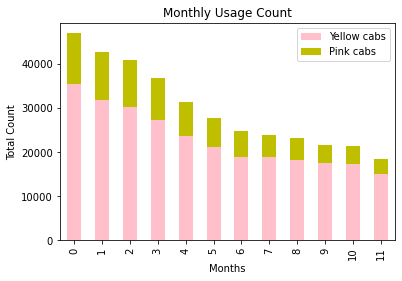

In [117]:
plt.figure(figsize=(18,14))
monthdata_allcabs['Yellow cabs'] = monthdata_allcabs['Yellow cabs'].astype(int)
monthdata_allcabs['Pink cabs'] = monthdata_allcabs['Pink cabs'].astype(int)
from itertools import cycle, islice
my_colors = list(islice(cycle([ 'pink', 'y', 'k']), None, len(rm)))
monthdata_allcabs.plot(kind='bar', stacked=True, color=my_colors)
plt.xlabel("Months")
plt.ylabel("Total Count")
plt.title('Monthly Usage Count')

In [119]:
data = {'Years':  ["2016","2017","2018","2016","2017","2018"],
        'Cab': ["Yellow","Yellow","Yellow","Pink","Pink","Pink"],
        'Profit': ['13926995', "16575977","13517399","1560162","2033654","1713511"],
        'Routes': ['82239', "98189","94253","25080","30321","29310"],
        'Profit Per Route': ['169', "168","143","62","67","58"]
       }
profitperyears= pd.DataFrame (data, columns = ['Years','Cab',"Profit","Routes","Profit Per Route"])
profitperyears

,Years,Cab,Profit,Routes,Profit Per Route
0,2016,Yellow,13926995,82239,169
1,2017,Yellow,16575977,98189,168
2,2018,Yellow,13517399,94253,143
3,2016,Pink,1560162,25080,62
4,2017,Pink,2033654,30321,67
5,2018,Pink,1713511,29310,58


Text(0.5, 1.0, 'Total Profit For Pink and Yellow Cab Per Year 2016 - 2018')

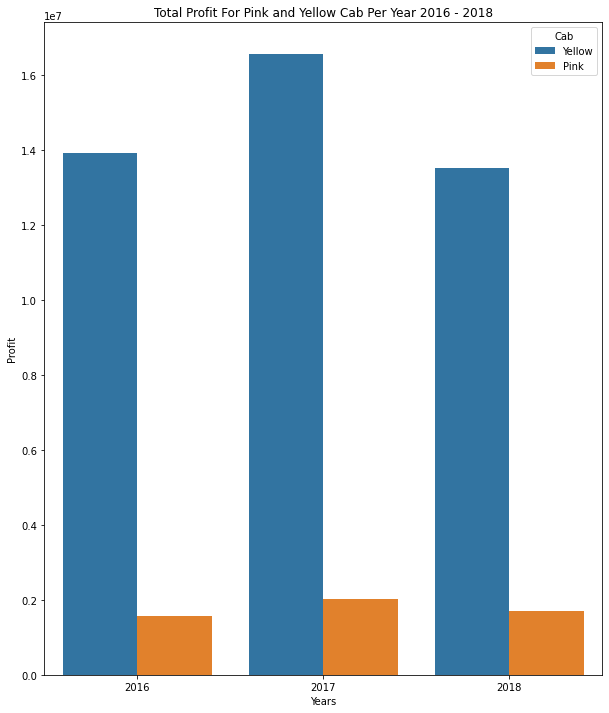

In [124]:
profitperyears['Profit'] = profitperyears['Profit'].astype(int)
plt.figure(figsize=(10,12))
sns.barplot(x='Years',y='Profit',hue='Cab',data=profitperyears)
plt.title('Total Profit For Pink and Yellow Cab Per Year 2016 - 2018')

In [129]:
data = {'Years':  ["2016","2017","2018","2016","2017","2018"],
        'Cab': ["Pink","Pink","Pink","Yellow","Yellow","Yellow"],
        'Profit Per Km': ["3.0268","2.9628","2.3504",'7.4898', "7.4946","6.3648"]
       }
profitperkm= pd.DataFrame (data, columns = ['Years','Cab',"Profit Per Km"])
profitperkm

,Years,Cab,Profit Per Km
0,2016,Pink,3.0268
1,2017,Pink,2.9628
2,2018,Pink,2.3504
3,2016,Yellow,7.4898
4,2017,Yellow,7.4946
5,2018,Yellow,6.3648


Text(0.5, 1.0, 'Average Profit Per KM For Pink and Yellow Cab From 2016 to 2018')

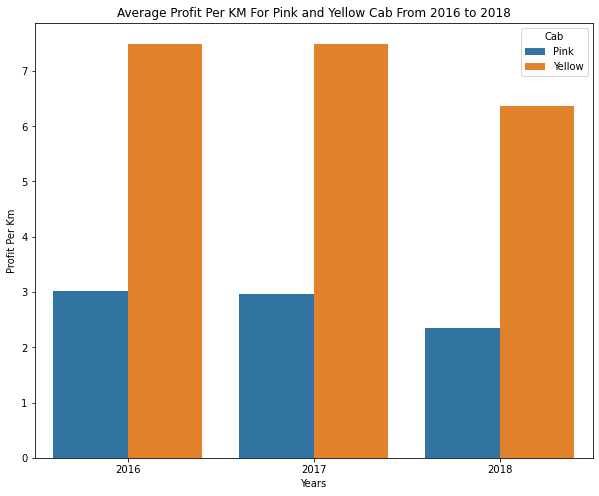

In [131]:
sns.color_palette("hls")
profitperkm['Profit Per Km'] = profitperkm['Profit Per Km'].astype(float)
plt.figure(figsize=(10,8))
sns.barplot(x='Years',y='Profit Per Km',hue='Cab',data=profitperkm)
plt.title('Average Profit Per KM For Pink and Yellow Cab From 2016 to 2018')

In [133]:
#Gender Male and Female
data = {'Years':  ["2016","2016","2017","2017","2018","2018","2016","2016","2017","2017","2018","2018"],
        'Cab': ["Pink","Pink","Pink","Pink","Pink","Pink","Yellow","Yellow","Yellow","Yellow","Yellow","Yellow"],
        'Gender': ["Female","Male","Female","Male","Female","Male","Female","Male","Female","Male","Female","Male"],
        'Profit': [736301,977209,896924,1136729,697306,862856,5581321,8345673,6904150,9671827,5645945,7871453],
        'Profit Percentage': [42,58,44,56,44,56,40,60,41,59,41,59]
       }
profitgenderyearly= pd.DataFrame (data, columns = ['Years','Cab',"Gender","Profit","Profit Percentage"])
profitgenderyearly

,Years,Cab,Gender,Profit,Profit Percentage
0,2016,Pink,Female,736301,42
1,2016,Pink,Male,977209,58
2,2017,Pink,Female,896924,44
3,2017,Pink,Male,1136729,56
4,2018,Pink,Female,697306,44
5,2018,Pink,Male,862856,56
6,2016,Yellow,Female,5581321,40
7,2016,Yellow,Male,8345673,60
8,2017,Yellow,Female,6904150,41
9,2017,Yellow,Male,9671827,59


<AxesSubplot:xlabel='Cab', ylabel='Profit'>

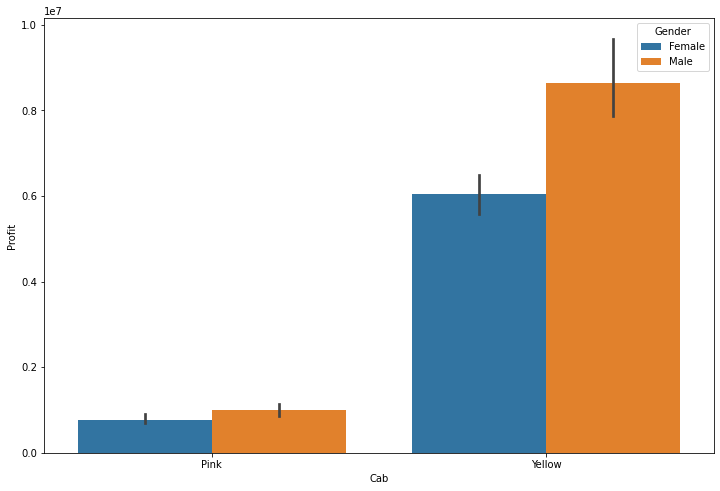

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit',hue='Gender',data=profitgenderyearly)

<AxesSubplot:xlabel='Years', ylabel='Profit'>

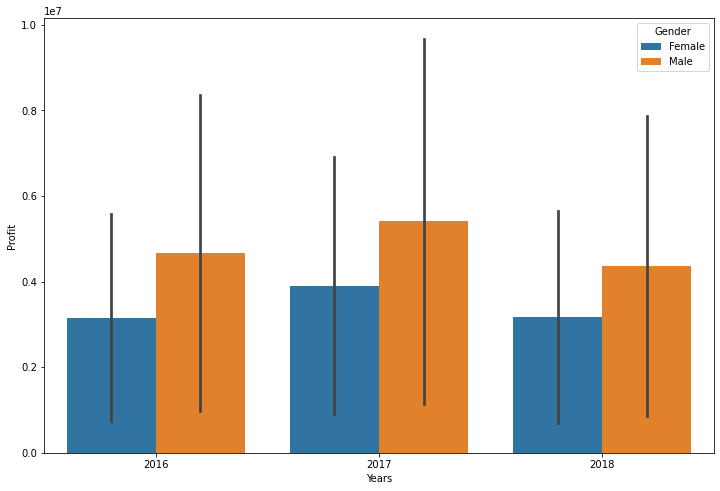

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(x='Years',y='Profit',hue='Gender',data=profitgenderyearly)

In [136]:
data = {'Cab': ["Pink","Pink","Yellow","Yellow",],
        'Gender': ["Female","Male","Female","Male"],
        'Profit Percentage': [42,58,40,60]
       }
profitgender2016= pd.DataFrame (data, columns = ['Cab',"Gender","Profit Percentage"])
profitgender2016

,Cab,Gender,Profit Percentage
0,Pink,Female,42
1,Pink,Male,58
2,Yellow,Female,40
3,Yellow,Male,60


In [137]:
data = {'Cab': ["Pink","Pink","Yellow","Yellow",],
        'Gender': ["Female","Male","Female","Male"],
        'Profit Percentage': [42,58,40,60]
       }
profitgender2016= pd.DataFrame (data, columns = ['Cab',"Gender","Profit Percentage"])
profitgender2016

,Cab,Gender,Profit Percentage
0,Pink,Female,42
1,Pink,Male,58
2,Yellow,Female,40
3,Yellow,Male,60


In [138]:
data = {'Cab': ["Pink","Pink","Yellow","Yellow",],
        'Gender': ["Female","Male","Female","Male"],
        'Profit Percentage': [44,56,41,59]
       }
profitgender2017= pd.DataFrame (data, columns = ['Cab',"Gender","Profit Percentage"])
profitgender2017

,Cab,Gender,Profit Percentage
0,Pink,Female,44
1,Pink,Male,56
2,Yellow,Female,41
3,Yellow,Male,59


In [139]:
data = {'Cab': ["Pink","Pink","Yellow","Yellow",],
        'Gender': ["Female","Male","Female","Male"],
        'Profit Percentage': [44,56,41,59]
       }
profitgender2018= pd.DataFrame (data, columns = ['Cab',"Gender","Profit Percentage"])
profitgender2018

,Cab,Gender,Profit Percentage
0,Pink,Female,44
1,Pink,Male,56
2,Yellow,Female,41
3,Yellow,Male,59


Text(0.5, 1.0, 'Profit Percent Contributed by Each Gender at 2017')

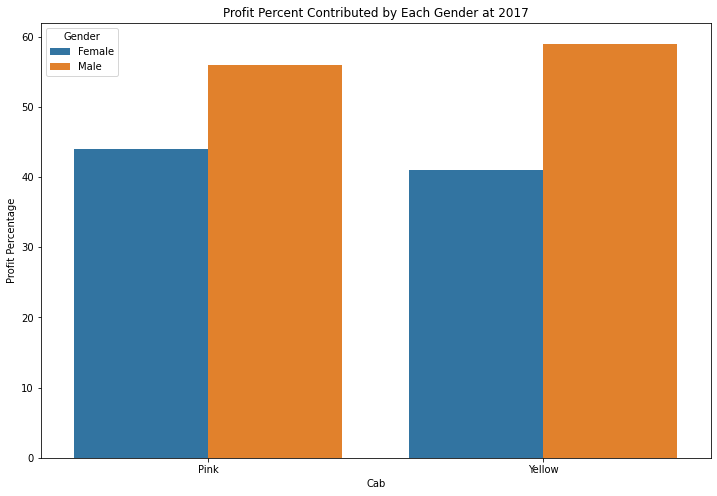

In [141]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Gender',data=profitgender2017)
plt.title('Profit Percent Contributed by Each Gender at 2017')

Text(0.5, 1.0, 'Profit Percent Contributed by Each Gender at 2018')

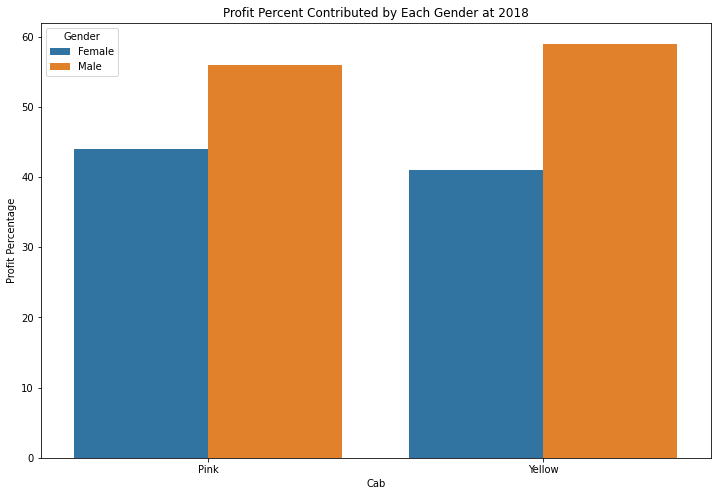

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Gender',data=profitgender2018)
plt.title('Profit Percent Contributed by Each Gender at 2018')

In [143]:
#income part
data = {'Cab': ["Pink","Pink","Pink","Yellow","Yellow","Yellow"],
        'Income': ["low","middle","high","low","middle","high"],
        'Count': [3321,23370,58020,10682,75301,188698],
        'Profit': [205176,1458294,3643858,1707065,11816865,30496441],
        'Profit Percentage': [3.86,27.47,68.67,3.87,26.84,69.29],
        
       }
profitincomeyearly= pd.DataFrame (data, columns = ['Cab',"Income","Count","Profit","Profit Percentage"])
profitincomeyearly

,Cab,Income,Count,Profit,Profit Percentage
0,Pink,low,3321,205176,3.86
1,Pink,middle,23370,1458294,27.47
2,Pink,high,58020,3643858,68.67
3,Yellow,low,10682,1707065,3.87
4,Yellow,middle,75301,11816865,26.84
5,Yellow,high,188698,30496441,69.29


Text(0.5, 1.0, 'Profit Contribution by Income Levels')

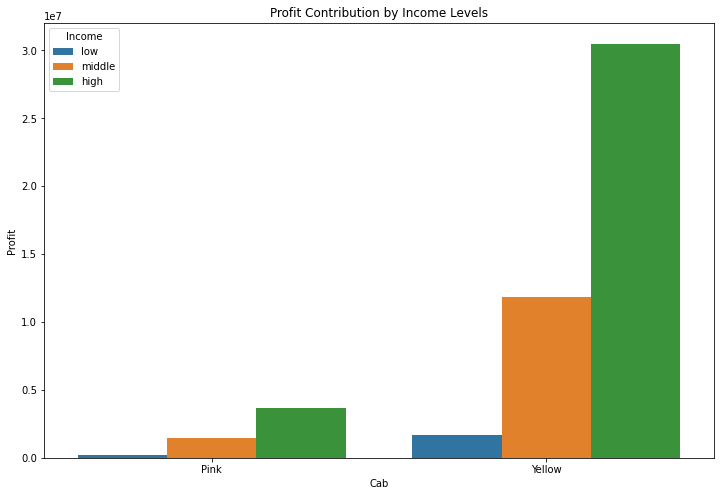

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit',hue='Income',data=profitincomeyearly)
plt.title('Profit Contribution by Income Levels')

Text(0.5, 1.0, 'Profit Contribution by Income Levels')

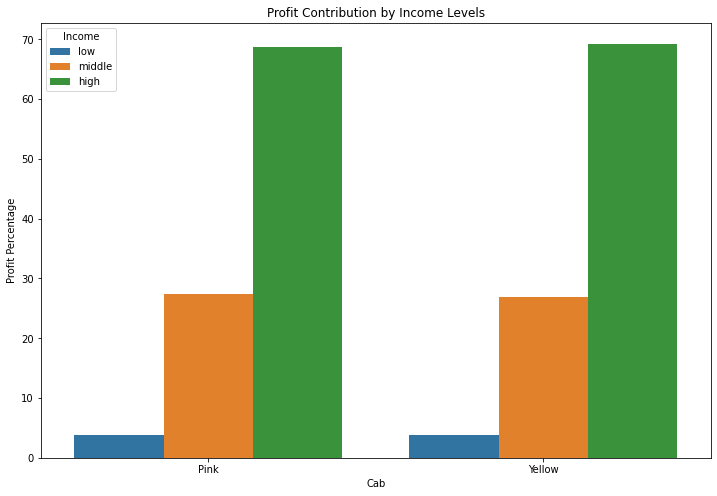

In [147]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Income',data=profitincomeyearly)
plt.title('Profit Contribution by Income Levels')

In [149]:
#age brackets
data = {'Cab': ["Pink","Pink","Pink","Pink","Yellow","Yellow","Yellow","Yellow"],
        'Age': ["18-25","26-45","46-65","65+","18-25","26-45","46-65","65+"],
        'Profit': [1227715,2892851,1138719,48042,10044395,24113142,9512924,349911],
        'Profit Percentage': [23.13,54.50,21.45,0.92,22.81,54.77,21.61,0.81],
        
       }
profitageyearly= pd.DataFrame (data, columns = ['Cab',"Age","Profit","Profit Percentage"])
profitageyearly

,Cab,Age,Profit,Profit Percentage
0,Pink,18-25,1227715,23.13
1,Pink,26-45,2892851,54.50
2,Pink,46-65,1138719,21.45
3,Pink,65+,48042,0.92
4,Yellow,18-25,10044395,22.81
5,Yellow,26-45,24113142,54.77
6,Yellow,46-65,9512924,21.61
7,Yellow,65+,349911,0.81


Text(0.5, 1.0, 'Profit Percent Contributed by Each Age Group')

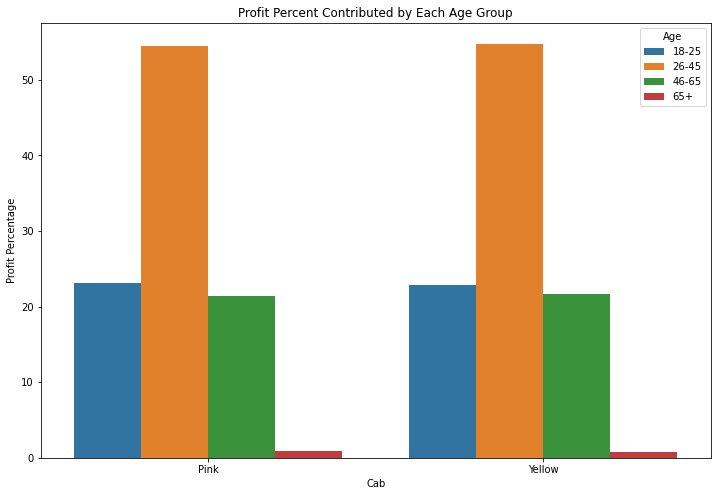

In [150]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Age',data=profitageyearly)
plt.title('Profit Percent Contributed by Each Age Group')

In [151]:
data = {'Cab': ["Pink","Pink","Yellow","Yellow"],
        'Method': ["Cash","Card","Cash","Card"],
        'Profit': [2126725,3180602,17658295,26362077],
        'Profit Percentage': [40.08,59.92,40.12,59.88],
        
       }
profitmethod= pd.DataFrame (data, columns = ['Cab',"Method","Profit","Profit Percentage"])
profitmethod

,Cab,Method,Profit,Profit Percentage
0,Pink,Cash,2126725,40.08
1,Pink,Card,3180602,59.92
2,Yellow,Cash,17658295,40.12
3,Yellow,Card,26362077,59.88


Text(0.5, 1.0, 'Profit Percent Contributed by Payment Modes')

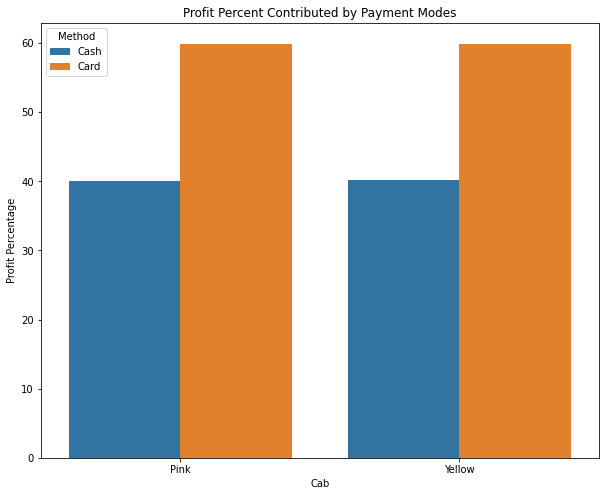

In [154]:
plt.figure(figsize=(10,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Method',data=profitmethod)
plt.title('Profit Percent Contributed by Payment Modes')

In [155]:
data = {'Cab': ["Pink","Pink","Pink","Yellow","Yellow","Yellow"],
        'Year': ["2016","2017","2018","2016","2017","2018"],
        'Profit': [1560162,2033654,1713511,13926995,16575977,13517399],
        'Profit Percentage': [29.39,38.31,32.30,31.63,37.65,30.72]
        
       }
profityearlyprofits= pd.DataFrame (data, columns = ['Cab',"Year","Profit",'Profit Percentage'])
profityearlyprofits

,Cab,Year,Profit,Profit Percentage
0,Pink,2016,1560162,29.39
1,Pink,2017,2033654,38.31
2,Pink,2018,1713511,32.30
3,Yellow,2016,13926995,31.63
4,Yellow,2017,16575977,37.65
5,Yellow,2018,13517399,30.72


<AxesSubplot:xlabel='Cab', ylabel='Profit Percentage'>

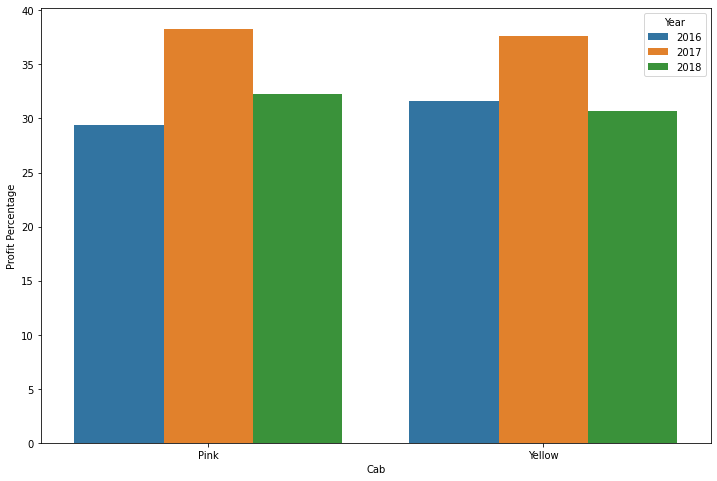

In [156]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cab',y='Profit Percentage',hue='Year',data=profityearlyprofits)

In [157]:
yellow_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      274681 non-null  int64         
 1   Date of Travel      274681 non-null  datetime64[ns]
 2   Company             274681 non-null  object        
 3   City                274681 non-null  object        
 4   KM Travelled        274681 non-null  float64       
 5   Price Charged       274681 non-null  float64       
 6   Cost of Trip        274681 non-null  float64       
 7   Customer_ID         274681 non-null  int64         
 8   Payment_Mode        274681 non-null  object        
 9   Gender              274681 non-null  object        
 10  Age                 274681 non-null  int64         
 11  Income (USD/Month)  274681 non-null  int64         
 12  Population          274681 non-null  object        
 13  Users               274681 no

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Profit Per Day For Yellow Cab in Month')

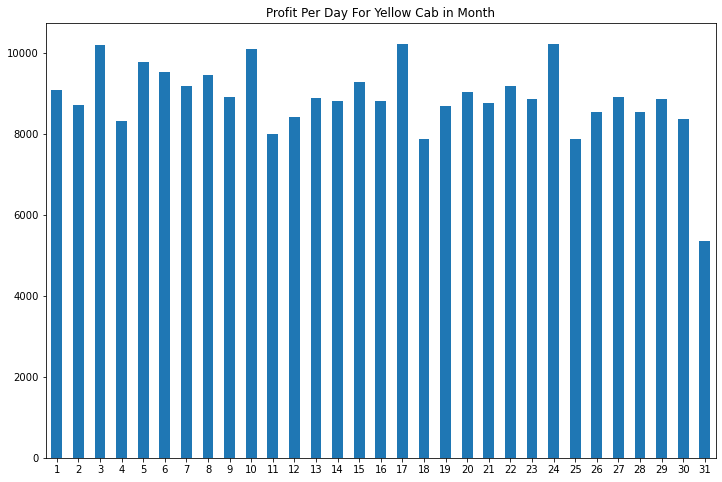

In [159]:
yellow_cab['day'] = yellow_cab['day'].astype(int)
plt.figure(figsize=(12,8))
yellow_cab['day'].value_counts(sort=False).plot.bar(rot=0)
plt.title('Profit Per Day For Yellow Cab in Month')

/Users/mapike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Profit Per Day For Pink Cab in A Month')

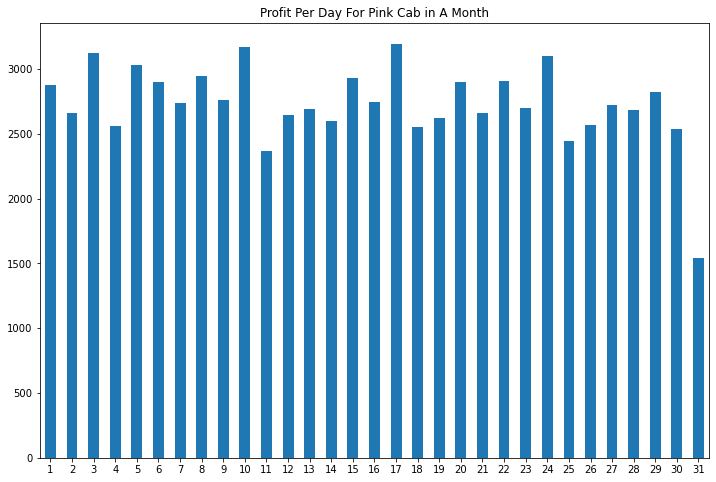

In [160]:
pink_cab['day'] = pink_cab['day'].astype(int)
plt.figure(figsize=(12,8))
pink_cab['day'].value_counts(sort=False).plot.bar(rot=0)
plt.title('Profit Per Day For Pink Cab in A Month')

In [161]:
data = {'City': ["ATLANTA GA","NEW YORK NY","DENVER CO","PITTSBURGH PA","LOS ANGELES CA","CHICAGO IL","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","SILICON VALLEY","SEATTLE WA","DALLAS TX","MIAMI FL","AUSTIN TX","ORANGE COUNTY","NASHVILLE TN","SACRAMENTO CA","PHOENIX AZ","TUCSON AZ"],
        'ProfitPinkCab': [96050,1511474,40584,17107,1125732,318722,193766,262001,637889,340250,112781,24730,162301,147445,101995,64284,55324,35596,59289],
        'ProfitYellowCab': [746382,26451089,357000,68058,3285976,3068590,3299103,1506717,949273,976454,491903,1104003,596000,379255,355006,85247,62002,157344,80971]
        
       }
profitcitywise= pd.DataFrame (data, columns = ['City',"ProfitPinkCab",'ProfitYellowCab'])
profitcitywise

,City,ProfitPinkCab,ProfitYellowCab
0,ATLANTA GA,96050,746382
1,NEW YORK NY,1511474,26451089
2,DENVER CO,40584,357000
3,PITTSBURGH PA,17107,68058
4,LOS ANGELES CA,1125732,3285976
5,CHICAGO IL,318722,3068590
6,WASHINGTON DC,193766,3299103
7,BOSTON MA,262001,1506717
8,SAN DIEGO CA,637889,949273
9,SILICON VALLEY,340250,976454


<AxesSubplot:xlabel='City', ylabel='ProfitPinkCab'>

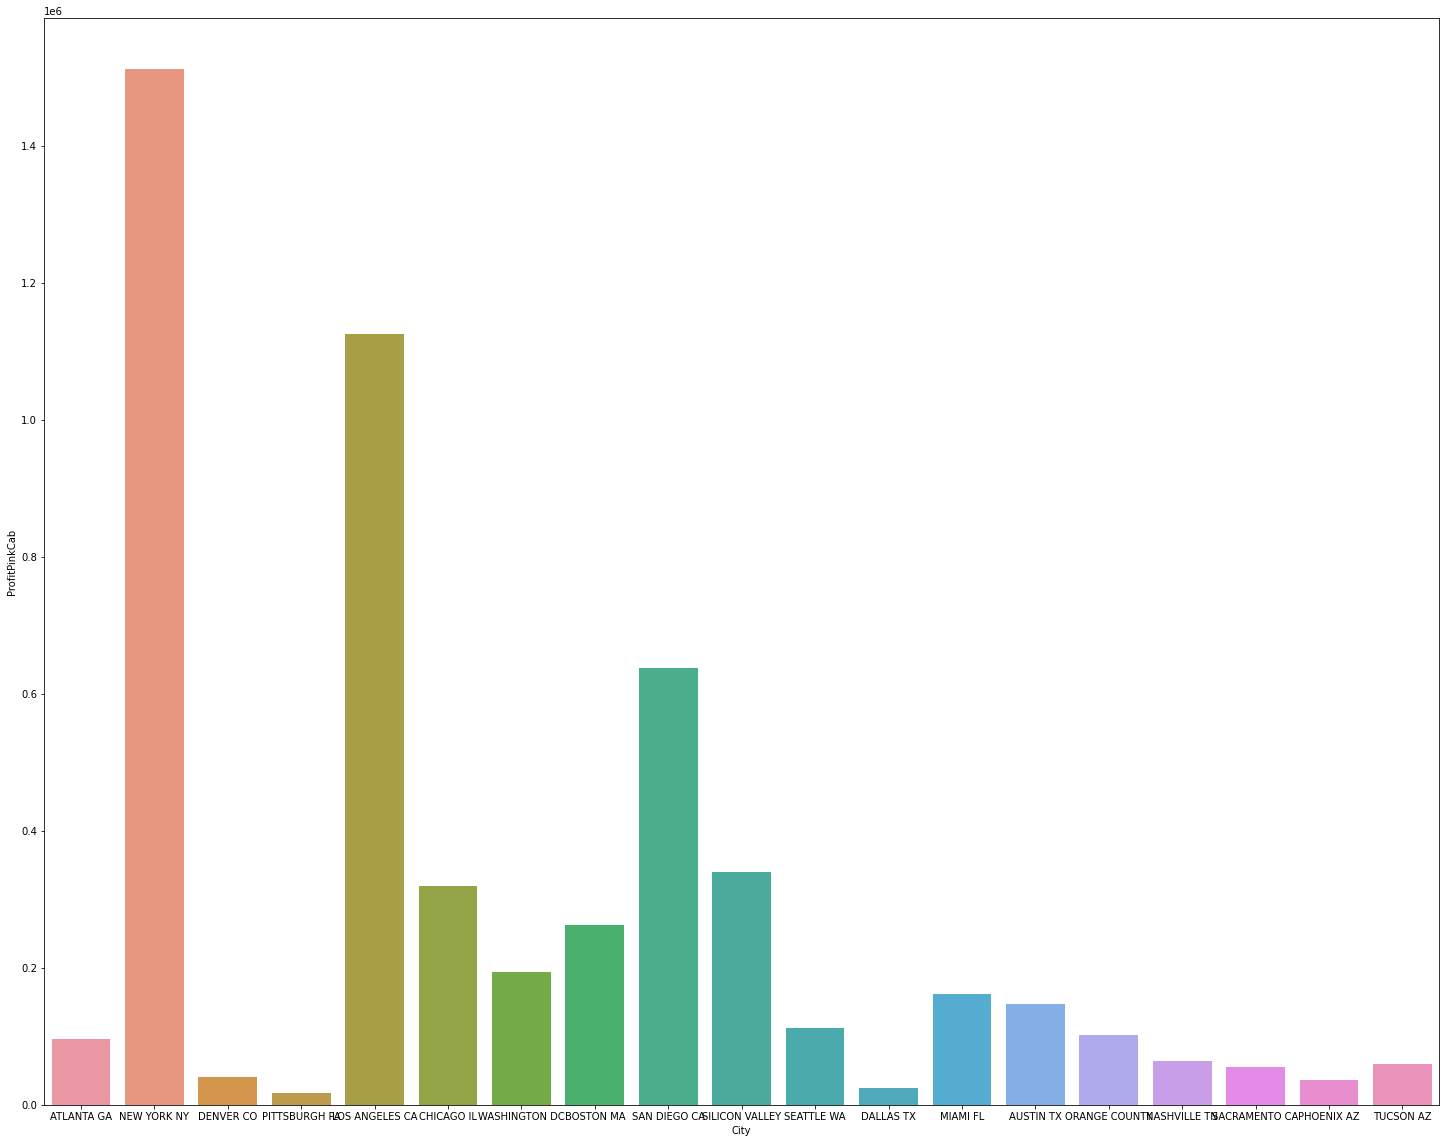

In [164]:
plt.figure(figsize=(25,20))
sns.barplot(x='City',y='ProfitPinkCab',data=profitcitywise)

<AxesSubplot:xlabel='City', ylabel='ProfitYellowCab'>

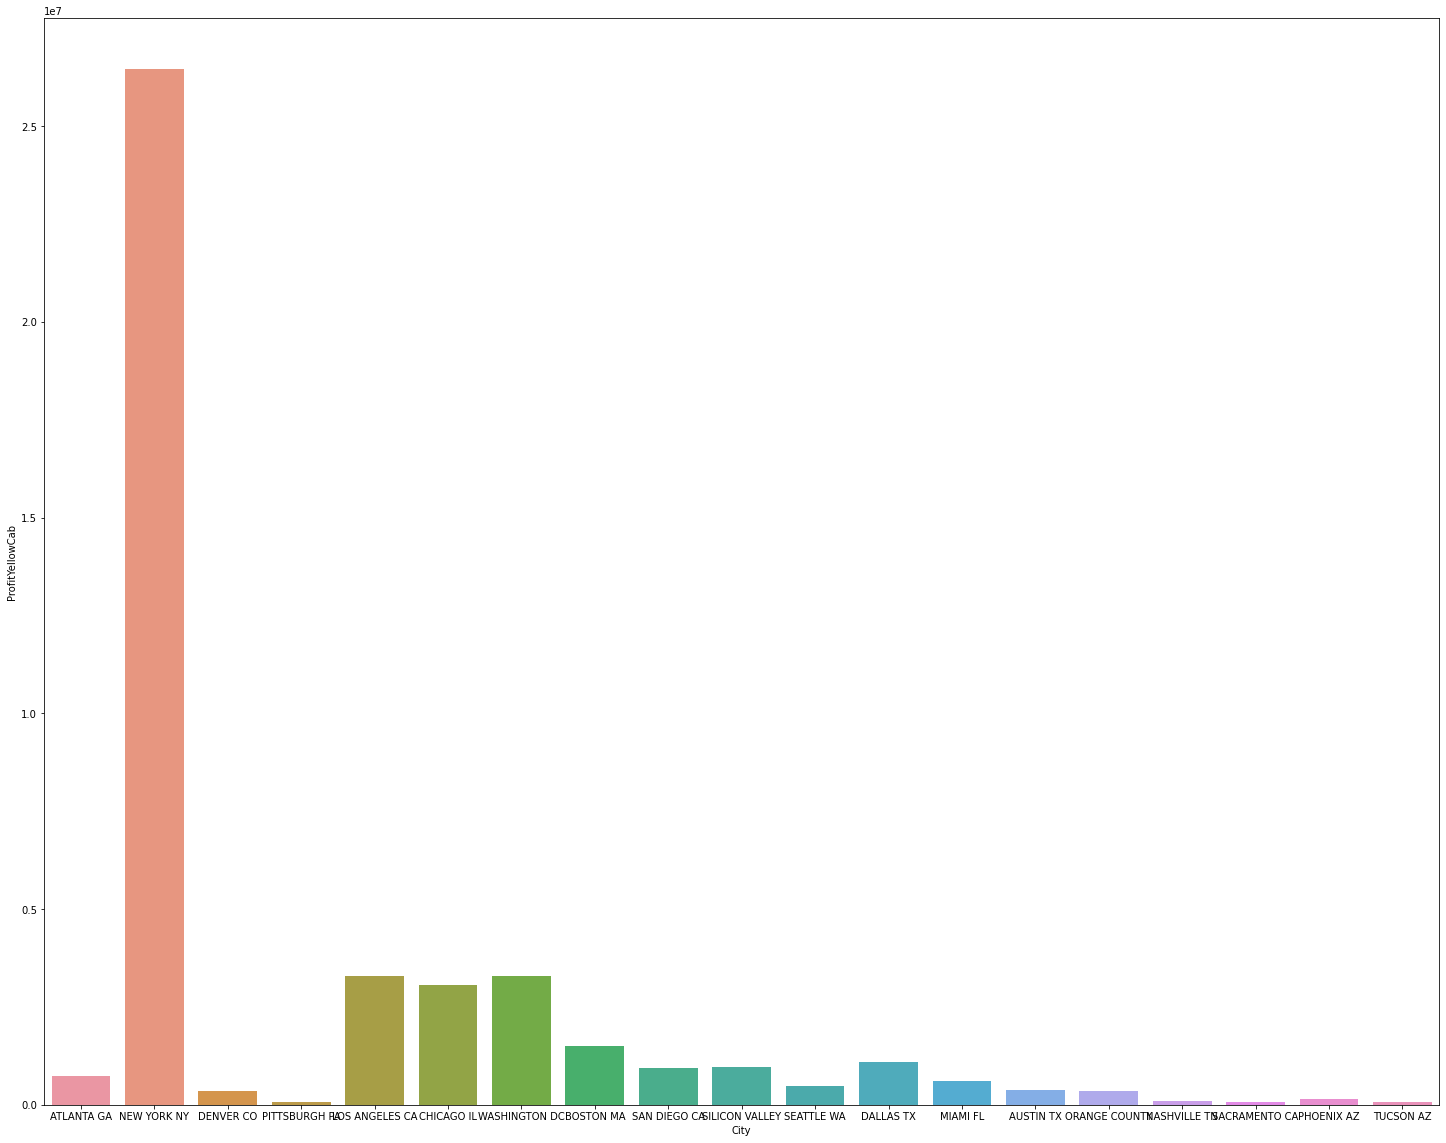

In [165]:
plt.figure(figsize=(25,20))
sns.barplot(x='City',y='ProfitYellowCab',data=profitcitywise)

In [166]:
pinkcab_moreten=pink_cab['Customer_ID'].value_counts()>10
pinkcab_moreten.value_counts()

False    32090
True       240
Name: Customer_ID, dtype: int64

In [167]:
pinkcab_morefifteen=pink_cab['Customer_ID'].value_counts()>15
pinkcab_morefifteen.value_counts()

False    32323
True         7
Name: Customer_ID, dtype: int64

In [168]:
pinkcab_morefive=pink_cab['Customer_ID'].value_counts()>5
pinkcab_morefive.value_counts()

False    28640
True      3690
Name: Customer_ID, dtype: int64

In [169]:
yellowcab_moreten=yellow_cab['Customer_ID'].value_counts()>10
yellowcab_moreten.value_counts()

False    30187
True      9709
Name: Customer_ID, dtype: int64

In [170]:
yellowcab_morefifteen=yellow_cab['Customer_ID'].value_counts()>15
yellowcab_morefifteen.value_counts()

False    34422
True      5474
Name: Customer_ID, dtype: int64

In [171]:
yellowcab_morefive=yellow_cab['Customer_ID'].value_counts()>5
yellowcab_morefive.value_counts()

False    25265
True     14631
Name: Customer_ID, dtype: int64

In [173]:
data = {'Cab': ["Pink","Yellow"],
        'Total Counts': [32330,39896],
        'More than 5': [3690,14631],
        'More than 10': [240,9709],
        'More than 15': [7,5474],
        'OnceUser%': [87.83,25.28],
        'More than 5%': [11.41,36.67],
        'More than 10%': [0.74,24.33],
        'More than 15%': [0.02,13.72]
        
       }
profitUser= pd.DataFrame (data, columns = ['Cab',"Total Counts",'More than 5','More than 10','More than 15','OnceUser%','More than 5%','More than 10%','More than 15%'])
profitUser

,Cab,Total Counts,More than 5,More than 10,More than 15,OnceUser%,More than 5%,More than 10%,More than 15%
0,Pink,32330,3690,240,7,87.83,11.41,0.74,0.02
1,Yellow,39896,14631,9709,5474,25.28,36.67,24.33,13.72


In [174]:
data = {
        'Percentage': [87.83,11.41,0.75],
        'Labels': ['OnceUser%','More then 5%','More then 10% and 15%']
        
       }
profitUserPink= pd.DataFrame (data, columns = ['Percentage','Labels'])
profitUserPink

,Percentage,Labels
0,87.83,OnceUser%
1,11.41,More then 5%
2,0.75,More then 10% and 15%


In [176]:
data = {

        'Percentage': [25.28,36.67,24.33,13.72],
        'Labels': ['OnceUser%','More then 5%','More then 10%','More then 15%']
        
       }
profitUserYellow= pd.DataFrame (data, columns = ['Percentage','Labels'])
profitUserYellow

,Percentage,Labels
0,25.28,OnceUser%
1,36.67,More then 5%
2,24.33,More then 10%
3,13.72,More then 15%


Text(0.5, 1.0, 'Customer Retention For Yellow Cab')

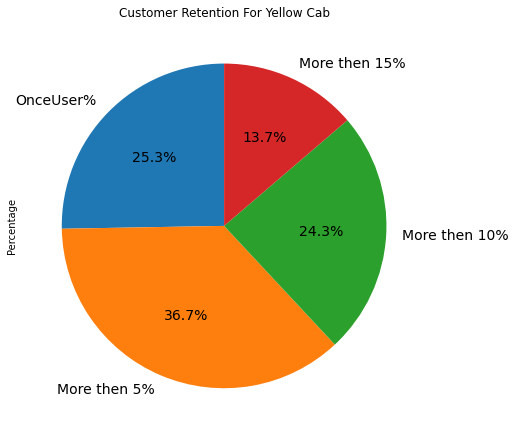

In [177]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
profitUserYellow.plot(kind='pie', y = 'Percentage', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=profitUserYellow['Labels'], legend = False, fontsize=14)
plt.title('Customer Retention For Yellow Cab')

Text(0.5, 1.0, 'Customer Retention For Pink Cab')

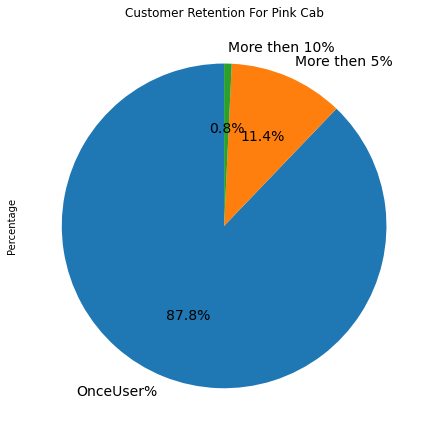

In [178]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
profitUserPink.plot(kind='pie', y = 'Percentage', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=profitUserYellow['Labels'], legend = False, fontsize=14)
plt.title('Customer Retention For Pink Cab')

In [180]:
data = {
        'Cab company': ["Pink","Yellow"],
        'Total Profit': [5307328,44020373],
         'Total Rides': [84711,274681],
        'Profit Per Ride': [62.6521,160.2599]
        
       }
Totalprofits= pd.DataFrame (data, columns = ['Cab company','Total Profit','Total Rides','Profit Per Ride'])
Totalprofits

,Cab company,Total Profit,Total Rides,Profit Per Ride
0,Pink,5307328,84711,62.6521
1,Yellow,44020373,274681,160.2599


In [182]:
data = {'City': ["ATLANTA GA","NEW YORK NY","DENVER CO","PITTSBURGH PA","LOS ANGELES CA","CHICAGO IL","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","SILICON VALLEY","SEATTLE WA","DALLAS TX","MIAMI FL","AUSTIN TX","ORANGE COUNTY","NASHVILLE TN","SACRAMENTO CA","PHOENIX AZ","TUCSON AZ"],
        'ProfitPinkcab': [96050,1511474,40584,17107,1125732,318722,193766,262001,637889,340250,112781,24730,162301,147445,101995,64284,55324,35596,59289],
        'ProfitYellowcab': [746382,26451089,357000,68058,3285976,3068590,3299103,1506717,949273,976454,491903,1104003,596000,379255,355006,85247,62002,157344,80971],
        'TotalUsagePinkcab': [1762,13967,1394,682,19865,9361,3692,5186,10672,3797,2732,1380,2002,1868,1513,1841,1334,864,799],
    
        'TotalUsageYellowcab': [5795,85918,2431,631,28168,47264,40045,24506,9816,4722,5265,5637,4452,3028,2469,1169,1033,1200,1132]
       }
profitcity= pd.DataFrame (data, columns = ['City',"ProfitPinkcab",'ProfitYellowcab','TotalUsagePinkcab','TotalUsageYellowcab'])

In [190]:
profitcity['Profit Percentage Pink'] = profitcity.apply(lambda row: row.ProfitPinkcab / row.TotalUsagePinkcab, axis=1)
profitcity['Profit Percentage Yellow'] = profitcity.apply(lambda row: row.ProfitYellowcab / row.TotalUsageYellowcab, axis=1)

In [191]:
plotdata = pd.DataFrame({
   'ProfitPinkcab': [96050,1511474,40584,17107,1125732,318722,193766,262001,637889,340250,112781,24730,162301,147445,101995,64284,55324,35596,59289],
        'ProfitYellowcab': [746382,26451089,357000,68058,3285976,3068590,3299103,1506717,949273,976454,491903,1104003,596000,379255,355006,85247,62002,157344,80971],
        'TotalUsagePinkcab': [1762,13967,1394,682,19865,9361,3692,5186,10672,3797,2732,1380,2002,1868,1513,1841,1334,864,799],
    
        'TotalUsageYellowcab': [5795,85918,2431,631,28168,47264,40045,24506,9816,4722,5265,5637,4452,3028,2469,1169,1033,1200,1132]
    }, 
    index=["ATLANTA GA","NEW YORK NY","DENVER CO","PITTSBURGH PA","LOS ANGELES CA","CHICAGO IL","WASHINGTON DC","BOSTON MA","SAN DIEGO CA","SILICON VALLEY","SEATTLE WA","DALLAS TX","MIAMI FL","AUSTIN TX","ORANGE COUNTY","NASHVILLE TN","SACRAMENTO CA","PHOENIX AZ","TUCSON AZ"]
)

In [192]:
plotdata['Profit Percentage Pink'] = plotdata.apply(lambda row: row.ProfitPinkcab / row.TotalUsagePinkcab, axis=1)
plotdata['Profit Percentage Yellow'] = plotdata.apply(lambda row: row.ProfitYellowcab / row.TotalUsageYellowcab, axis=1)

Text(0, 0.5, 'Percentage Profit (%)')

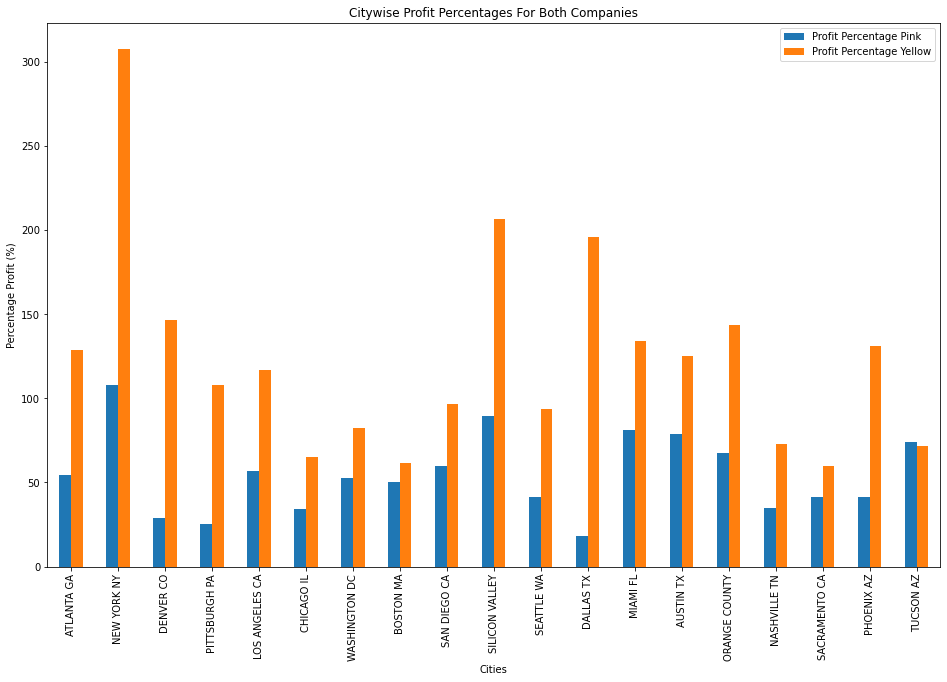

In [193]:
plotdata.drop(['ProfitPinkcab', 'ProfitYellowcab',"TotalUsagePinkcab","TotalUsageYellowcab"], axis=1, inplace=True)
plotdata.plot(kind="bar",figsize=(16,10))
plt.title("Citywise Profit Percentages For Both Companies")
plt.xlabel("Cities")
plt.ylabel("Percentage Profit (%)")